In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
#!yolo mode=checks

In [3]:
!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 25.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Drone-vs-bird-v3-1 in yolov11:: 100%|██████████| 5068/5068 [00:00<00:00, 7619.95it/s]


In [4]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.192 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Drone-vs-bird-v3-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

In [5]:
# --- Run trained YOLO model on a video and show inline in Colab ---
from ultralytics import YOLO
import glob, os
from IPython.display import HTML
from base64 import b64encode

# 1) Load your trained weights (update path if your run folder is different)
model = YOLO("/content/runs/detect/train/weights/best.pt")

# 2) Path to your input video
video_path = "/content/IMG_0510.mp4"  # <-- upload this to Colab first

# 3) Run prediction on the video (saves output automatically)
results = model.predict(source=video_path, save=True)

# 4) Locate the saved prediction video
pred_dirs = sorted(glob.glob("runs/detect/predict*"))
out_dir = pred_dirs[-1]
out_videos = sorted(glob.glob(os.path.join(out_dir, "*.mp4")))

# 5) Display video inline in notebook
if out_videos:
    out_video = out_videos[0]
    print(f"✅ Prediction saved to: {out_video}")
    mp4 = open(out_video,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    display(HTML(f"""
      <video width=700 controls>
            <source src="{data_url}" type="video/mp4">
      </video>
    """))
else:
    print("⚠️ No output video found in:", out_dir)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/608) /content/IMG_0510.mp4: 384x640 (no detections), 53.4ms
video 1/1 (frame 2/608) /content/IMG_0510.mp4: 384x640 (no detections), 10.9ms
video 1/1 (frame 3/608) /content/IMG_0510.mp4: 384x640 (no detections), 10.9ms
video 1/1 (frame 4/608) /content/IMG_0510.mp4: 384x640 (no detections), 11.0ms
video 1/1 (frame 5/608) /content/IMG_0510.mp4: 384x640 (no detections), 10.9ms
video 1/1 (frame 6/608) /content/IMG_0510.mp4: 384x640 1 Bird


image 1/1 /content/drone-bird-sky-173942361.webp: 384x640 1 Bird, 1 Drone, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
✅ Prediction saved to: runs/detect/predict3/drone-bird-sky-173942361.jpg


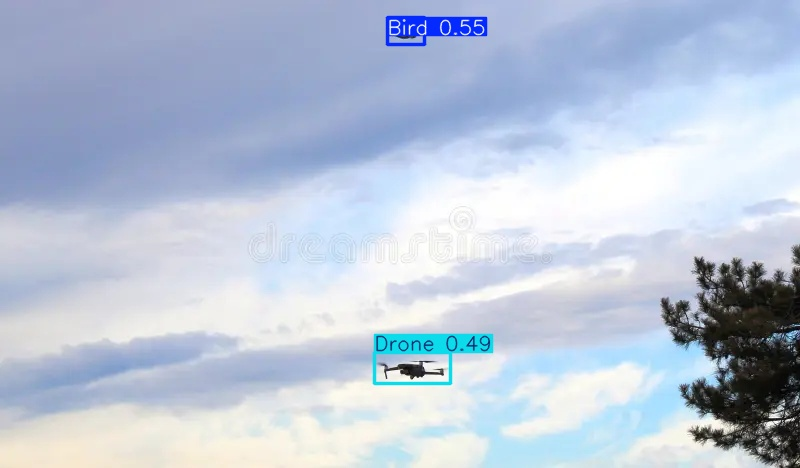

In [8]:
# --- Run trained YOLO model on a single image in Colab ---
from ultralytics import YOLO
import glob, os
from IPython.display import Image, display

# 1) Load your trained weights
model = YOLO("/content/runs/detect/train/weights/best.pt")

# 2) Path to your test image
img_path = "/content/drone-bird-sky-173942361.webp"

# 3) Run inference (save results automatically to runs/detect/predictX/)
results = model.predict(source=img_path, save=True)

# 4) Find the saved prediction image
pred_dirs = sorted(glob.glob("runs/detect/predict*"))
out_dir = pred_dirs[-1]
outs = sorted(glob.glob(os.path.join(out_dir, "*.jpg")) +
              glob.glob(os.path.join(out_dir, "*.png")))

# 5) Display the annotated result inline
if outs:
    print(f"✅ Prediction saved to: {outs[0]}")
    display(Image(filename=outs[0]))
else:
    print("⚠️ No output image found in:", out_dir)
